In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.cluster import KMeans
#from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


KeyboardInterrupt: 

# Importing Data

In [ ]:
df = pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df['Hazardous']

0        True
1       False
2        True
3       False
4        True
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

In [ ]:
df["Hazardous"] = df["Hazardous"].astype(int)

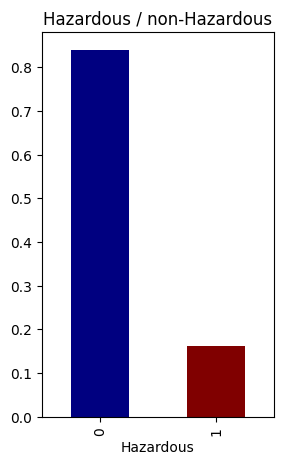

In [ ]:
fig = plt.figure(figsize = (3,5))
df['Hazardous'].value_counts(normalize = True, ascending = False).plot(kind='bar', color=['navy', 'maroon'])
plt.title('Hazardous / non-Hazardous')
plt.show()

In [ ]:
class_distribution_before = df['Hazardous'].value_counts()
print(class_distribution_before)

Hazardous
0    3932
1     755
Name: count, dtype: int64


# EDA

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class


AV = AutoViz_Class()

import matplotlib.pyplot as plt
%matplotlib inline
filename = r"E:\Program Files (x86)\ML Project\Asteroid Classification - c\hazardous-asteroid-detection\nasa.csv"

dft = AV.AutoViz(
    filename,
    sep=','
)

# Data Preperation
Resolving class imbalance with oversampling technique

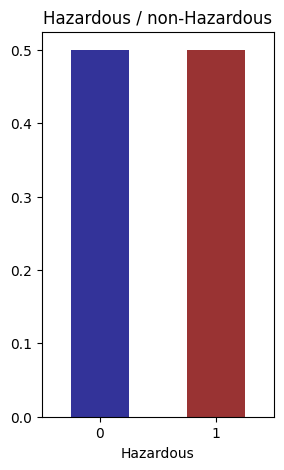

In [ ]:
from sklearn.utils import resample

false = df[df['Hazardous'] == 0]
true = df[df.Hazardous == 1]
true_oversampled = resample(true, replace=True, n_samples=len(false), random_state=12345)
df_oversampled = pd.concat([false, true_oversampled])

fig = plt.figure(figsize = (3,5))
df_oversampled.Hazardous.value_counts(normalize = True, ascending = False).plot(kind='bar', color=['navy', 'maroon'], alpha = 0.8, rot=0)
plt.title('Hazardous / non-Hazardous')
plt.show()

In [ ]:
class_distribution_after = df_oversampled['Hazardous'].value_counts()
print(class_distribution_after)

Hazardous
0    3932
1    3932
Name: count, dtype: int64


# Detecting Null Values

In [ ]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7864 entries, 1 to 978
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Name                          7864 non-null   int64  
 2   Absolute Magnitude            7864 non-null   float64
 3   Est Dia in KM(min)            7864 non-null   float64
 4   Est Dia in KM(max)            7864 non-null   float64
 5   Est Dia in M(min)             7864 non-null   float64
 6   Est Dia in M(max)             7864 non-null   float64
 7   Est Dia in Miles(min)         7864 non-null   float64
 8   Est Dia in Miles(max)         7864 non-null   float64
 9   Est Dia in Feet(min)          7864 non-null   float64
 10  Est Dia in Feet(max)          7864 non-null   float64
 11  Close Approach Date           7864 non-null   object 
 12  Epoch Date Close Approach     7864 non-null   int64  
 13  Relative 

# Encoding categorical features 

In [ ]:
# Initialize the encoder
encoder = LabelEncoder()

# Encode 'Orbiting Body' and 'Equinox' columns
df['Orbiting Body'] = encoder.fit_transform(df['Orbiting Body'])
df['Equinox'] = encoder.fit_transform(df['Equinox'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Check uniqueness of the index
if not df_oversampled.index.is_unique:
    # Reset the index to ensure uniqueness
    df_oversampled = df_oversampled.reset_index(drop=True)

# Two types of 'object' dtypes
categorical_cols = ['Orbiting Body', 'Equinox']
date_cols = ['Close Approach Date', 'Orbit Determination Date']

# Convert date-type features to ordinal values
for col in date_cols:
    df_oversampled[col] = df_oversampled[col].apply(lambda x: int(pd.Timestamp(x).timestamp()))

# Encoding other categorical features
# Initialize the encoder
encoder = OneHotEncoder()
cat_encoded_np = encoder.fit_transform(df_oversampled[categorical_cols]).toarray() # Dense numpy array

# Create a DataFrame from the one-hot encoded array
cat_encoded_df = pd.DataFrame(cat_encoded_np)

# Assign column names to the DataFrame
cat_encoded_df.columns = encoder.get_feature_names_out(categorical_cols)

# Remove categorical columns from the dataset
df_cat_dropped = df_oversampled.drop(categorical_cols, axis=1)

# Concatenate the encoded categorical features and the rest of the dataset
encoded_df = pd.concat([df_cat_dropped, cat_encoded_df], axis=1)

# Print the resulting encoded DataFrame
print(encoded_df)


      Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0              3723955  3723955                21.3            0.146068   
1              3092506  3092506                27.4            0.008801   
2              3671135  3671135                19.6            0.319562   
3              2495323  2495323                19.6            0.319562   
4              2153315  2153315                19.2            0.384198   
...                ...      ...                 ...                 ...   
7859           2085236  2085236                18.6            0.506471   
7860           2380636  2380636                19.7            0.305179   
7861           3521439  3521439                21.4            0.139494   
7862           2232691  2232691                19.8            0.291444   
7863           3743119  3743119                19.3            0.366906   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0               0.326618         

# Dimentionality Reduction

Dropping redundant data (in this case same data with different units)


1. 'Est Dia in KM(min)', 'Est Dia in M(min)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)',
2. 'Est Dia in KM(max)', 'Est Dia in M(max)', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)'
3. 'Relative Velocity km per sec', 'Relative Velocity km per hr'
4. 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'

Okay, now we can keep one from each line (1-4) and drop the others

In [ ]:
df_dropped = encoded_df.drop(['Est Dia in M(min)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)',
                       'Est Dia in M(max)', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)',
                       'Relative Velocity km per hr',
                       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(miles)'], axis=1)
# no change will take place in the original dataframe
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Name                          7864 non-null   int64  
 2   Absolute Magnitude            7864 non-null   float64
 3   Est Dia in KM(min)            7864 non-null   float64
 4   Est Dia in KM(max)            7864 non-null   float64
 5   Est Dia in M(min)             7864 non-null   float64
 6   Est Dia in M(max)             7864 non-null   float64
 7   Est Dia in Miles(min)         7864 non-null   float64
 8   Est Dia in Miles(max)         7864 non-null   float64
 9   Est Dia in Feet(min)          7864 non-null   float64
 10  Est Dia in Feet(max)          7864 non-null   float64
 11  Close Approach Date           7864 non-null   int64  
 12  Epoch Date Close Approach     7864 non-null   int64  
 13  Rel

In [ ]:
# 'df_dropped' is the new modified dataframe, 10 columns dropped
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Name                          7864 non-null   int64  
 2   Absolute Magnitude            7864 non-null   float64
 3   Est Dia in KM(min)            7864 non-null   float64
 4   Est Dia in KM(max)            7864 non-null   float64
 5   Close Approach Date           7864 non-null   int64  
 6   Epoch Date Close Approach     7864 non-null   int64  
 7   Relative Velocity km per sec  7864 non-null   float64
 8   Miles per hour                7864 non-null   float64
 9   Miss Dist.(kilometers)        7864 non-null   float64
 10  Orbit ID                      7864 non-null   int64  
 11  Orbit Determination Date      7864 non-null   int64  
 12  Orbit Uncertainity            7864 non-null   int64  
 13  Min

# Removing Multicollinearity

Plotting Heatmap for correlations

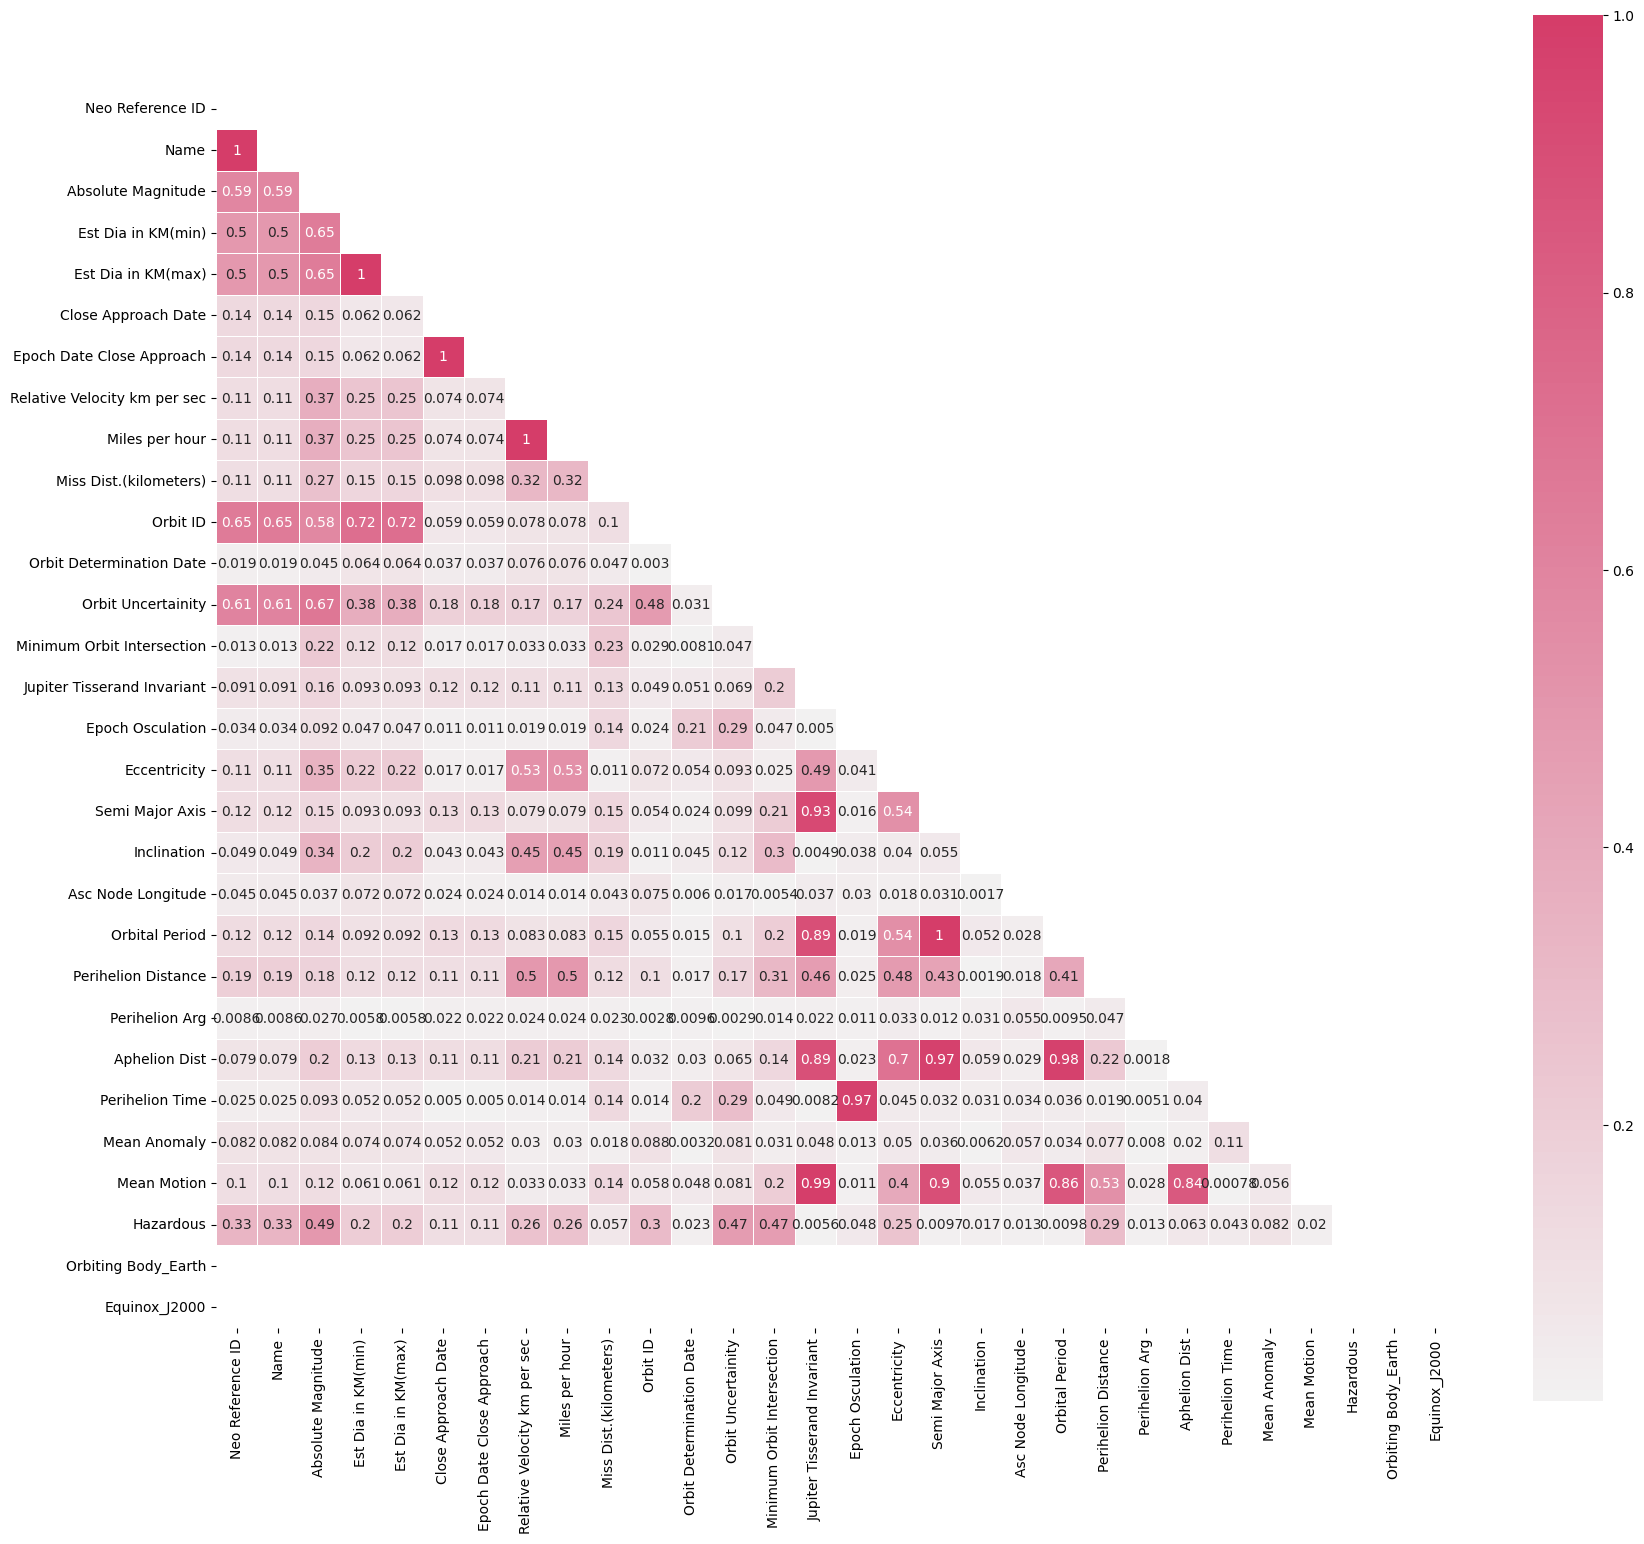

In [ ]:
# Correlation Detection
correlation_mat = df_dropped.corr().abs()

mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = True, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

# Print out almost perfect correlated features
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

In [ ]:
# dropping one of the features from each correlation (correlation > 90%)
df_cleaned = df_dropped.drop(['Name', 'Est Dia in KM(max)', 'Epoch Date Close Approach', 
                                            'Miles per hour', 'Semi Major Axis', 'Orbital Period', 
                                            'Aphelion Dist', 'Perihelion Time', 'Mean Motion'], axis=1)

In [ ]:
# 9 columns dropped
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Absolute Magnitude            7864 non-null   float64
 2   Est Dia in KM(min)            7864 non-null   float64
 3   Close Approach Date           7864 non-null   int64  
 4   Relative Velocity km per sec  7864 non-null   float64
 5   Miss Dist.(kilometers)        7864 non-null   float64
 6   Orbit ID                      7864 non-null   int64  
 7   Orbit Determination Date      7864 non-null   int64  
 8   Orbit Uncertainity            7864 non-null   int64  
 9   Minimum Orbit Intersection    7864 non-null   float64
 10  Jupiter Tisserand Invariant   7864 non-null   float64
 11  Epoch Osculation              7864 non-null   float64
 12  Eccentricity                  7864 non-null   float64
 13  Inc

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              7864 non-null   int64  
 1   Absolute Magnitude            7864 non-null   float64
 2   Est Dia in KM(min)            7864 non-null   float64
 3   Close Approach Date           7864 non-null   int64  
 4   Relative Velocity km per sec  7864 non-null   float64
 5   Miss Dist.(kilometers)        7864 non-null   float64
 6   Orbit ID                      7864 non-null   int64  
 7   Orbit Determination Date      7864 non-null   int64  
 8   Orbit Uncertainity            7864 non-null   int64  
 9   Minimum Orbit Intersection    7864 non-null   float64
 10  Jupiter Tisserand Invariant   7864 non-null   float64
 11  Epoch Osculation              7864 non-null   float64
 12  Eccentricity                  7864 non-null   float64
 13  Inc

### Normalization (modifying ranges of all features to be similar)

#### Re-positioning 'Hazardous' 

In [ ]:
# Get the 'Hazardous' column
hazardous_col = df_cleaned.iloc[:, 18]

# Remove the 'Hazardous' column from its original position
df_cleaned = df_cleaned.drop(columns=['Hazardous'])

# Add the 'Hazardous' column at the last position
df_cleaned['Hazardous'] = hazardous_col

In [ ]:
# Drop the label 'Hazardous' first
features = df_cleaned.drop(['Hazardous'], axis = 1)
print(features.shape)

(7864, 20)


In [ ]:
# Normalization
scaler = StandardScaler()
df_normalized = scaler.fit_transform(features)

In [ ]:
# Convert the ndarray to a DataFrame
df_normalized = pd.DataFrame(df_normalized)

# Save the DataFrame as a CSV file
df_normalized.to_csv('Nasa_mod.csv', index=False)

In [ ]:
df_cleaned.to_csv('Nasa_clea.csv', index=False)
df_cleaned.head()

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Close Approach Date,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Orbiting Body_Earth,Equinox_J2000,Hazardous
0,3723955,21.3,0.146068,788918400,18.113985,57298148.0,21,1491467569,3,0.186935,...,2458000.5,0.351674,28.412996,136.717242,0.718200,313.091975,173.741112,1.0,1.0,0
1,3092506,27.4,0.008801,790128000,11.173874,42683616.0,7,1491470149,6,0.005512,...,2458000.5,0.216578,7.905894,57.173266,0.983902,18.707701,68.741007,1.0,1.0,0
2,3671135,19.6,0.319562,790128000,10.808844,58759768.0,40,1496557012,1,0.272213,...,2458000.5,0.563441,17.927751,178.971951,0.577800,198.145969,354.237368,1.0,1.0,0
3,2495323,19.6,0.319562,790128000,10.808842,58759532.0,43,1498630765,1,0.272213,...,2458000.5,0.563441,17.927748,178.971953,0.577800,198.145960,354.237396,1.0,1.0,0
4,2153315,19.2,0.384198,790732800,24.421884,19324928.0,22,1491470825,0,0.098758,...,2458000.5,0.449763,34.695127,112.562984,0.680905,288.374651,186.776932,1.0,1.0,0


In [ ]:
# contains no label
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.969155,-0.032101,-0.301490,-1.874050,0.353462,0.824256,-0.369872,-0.140427,0.143032,1.690993,0.318795,0.282848,-0.342843,1.299270,-0.352869,-0.194988,1.285858,-0.127554,0.0,0.0
1,-0.069559,2.291898,-0.685388,-1.868023,-0.541365,0.153464,-0.684209,-0.140048,1.167755,-0.694170,0.033074,0.282848,-1.068858,-0.490203,-1.132371,0.916046,-1.618769,-1.119068,0.0,0.0
2,0.882268,-0.679773,0.183727,-1.868023,-0.588430,0.891343,0.056728,0.607413,-0.540116,2.812140,-0.256571,0.282848,0.795206,0.384316,0.061212,-0.782071,0.151710,1.576869,0.0,0.0
3,-1.051906,-0.679773,0.183727,-1.868023,-0.588431,0.891332,0.124086,0.912130,-0.540116,2.812140,-0.256571,0.282848,0.795206,0.384315,0.061212,-0.782071,0.151710,1.576869,0.0,0.0
4,-1.614499,-0.832166,0.364497,-1.865009,1.166775,-0.918674,-0.347419,-0.139949,-0.881691,0.531736,-0.101937,0.282848,0.184291,1.847457,-0.589572,-0.350938,1.041977,-0.004457,0.0,0.0


In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7864 non-null   float64
 1   1       7864 non-null   float64
 2   2       7864 non-null   float64
 3   3       7864 non-null   float64
 4   4       7864 non-null   float64
 5   5       7864 non-null   float64
 6   6       7864 non-null   float64
 7   7       7864 non-null   float64
 8   8       7864 non-null   float64
 9   9       7864 non-null   float64
 10  10      7864 non-null   float64
 11  11      7864 non-null   float64
 12  12      7864 non-null   float64
 13  13      7864 non-null   float64
 14  14      7864 non-null   float64
 15  15      7864 non-null   float64
 16  16      7864 non-null   float64
 17  17      7864 non-null   float64
 18  18      7864 non-null   float64
 19  19      7864 non-null   float64
dtypes: float64(20)
memory usage: 1.2 MB


# Train-Test-Split

In [ ]:
# Store all the features except the target variable
#features = df_cleaned.drop('Hazardous', axis=1)

#target = df_cleaned['Hazardous']

# Split the data into training and testing datasets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df_cleaned.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
    if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].values
        y = dataframe.iloc[:, -1].values
    elif isinstance(dataframe, np.ndarray):
        X = dataframe[:, :-1]
        y = dataframe[:, -1]
    else:
        raise ValueError("Unsupported data type. Expected pandas DataFrame or NumPy array.")

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [ ]:
from imblearn.over_sampling import RandomOverSampler
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN 

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

y_valid_pred = knn_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       465
           1       0.91      0.91      0.91       472

    accuracy                           0.91       937
   macro avg       0.91      0.91      0.91       937
weighted avg       0.91      0.91      0.91       937

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2085
           1       0.92      0.90      0.91      2030

    accuracy                           0.91      4115
   macro avg       0.91      0.91      0.91      4115
weighted avg       0.91      0.91      0.91      4115



# KMeans

In [ ]:
from collections import Counter
from colorama import Fore
from colorama import Back
# Modeling with K_Means
# Initialize an instance of KMeans with the optimal hyperparameter found earlier
k_means = KMeans(n_clusters=2).fit(df_normalized)

# Predict and store the clusters predicted for each data point(asteroid)
predictions = k_means.predict(df_normalized)

# Store the cluster labels
centroids = k_means.cluster_centers_

count = Counter(predictions)
for label, records in count.items():
    print(Fore.YELLOW + Back.BLACK + "Class: %d, Count= %d"%(label, records))

e:\Program Files (x86)\ML Project\Asteroid Classification - c\asteroidclassification\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Class: 0, Count= 4064
Class: 1, Count= 3800


In [ ]:
# Count the occurrences of each value in the 'Hazardous' column
count = Counter(df_cleaned['Hazardous'])

# Print the counts
print("Count of 0s:", count[0])
print("Count of 1s:", count[1])

Count of 0s: 3932
Count of 1s: 3932


# Neural Net

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(20,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
#least_val_loss = float('inf')
#least_loss_model = None
#epochs=100
#for num_nodes in [32]:
#  for dropout_prob in[0.2]:
#    for lr in [0.005]:
#      for batch_size in [64]:
#        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
#        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
#        val_loss = model.evaluate(X_valid, y_valid)[0]
#        if val_loss < least_val_loss:
#          least_val_loss = val_loss
#          least_loss_model = model

32 nodes, dropout 0.2, lr 0.005, batch size 64
30/30 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9915


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred, digits=4))

129/129 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9981    0.9890    0.9935      2085
           1     0.9888    0.9980    0.9934      2030

    accuracy                         0.9934      4115
   macro avg     0.9934    0.9935    0.9934      4115
weighted avg     0.9935    0.9934    0.9934      4115



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2085
           1       0.93      0.90      0.92      2030

    accuracy                           0.92      4115
   macro avg       0.92      0.92      0.92      4115
weighted avg       0.92      0.92      0.92      4115



# Log Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2085
           1       0.91      0.97      0.94      2030

    accuracy                           0.94      4115
   macro avg       0.94      0.94      0.94      4115
weighted avg       0.94      0.94      0.94      4115



# SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2085
           1       0.92      0.98      0.95      2030

    accuracy                           0.95      4115
   macro avg       0.95      0.95      0.95      4115
weighted avg       0.95      0.95      0.95      4115



In [ ]:
# Saving the model
import pickle
pickle.dump(model, open('asteroids_ml.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://0d2a7514-50ab-4ef9-bbec-f0ec09a8cbd0/assets
